In [1]:
# pip install -U spacy
# python -m spacy download en_core_web_sm
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")




In [2]:
# Take sample data
###https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis
text = ("""The 2007–2008 financial crisis, or Global Financial Crisis (GFC),
was the most severe worldwide economic crisis since the Great Depression.
Predatory lending in the form of subprime mortgages targeting low-income homebuyers,
[1] excessive risk-taking by global financial institutions,[2]
a continuous buildup of toxic assets within banks,
and the bursting of the United States housing bubble culminated in a "perfect storm",which led to the Great Recession.
Mortgage-backed securities (MBS) tied to American real estate, as well as a vast web of derivatives linked to those MBS,
collapsed in value. Financial institutions worldwide suffered severe damage,[3]
reaching a climax with the bankruptcy of Lehman Brothers on September 15, 2008,
and a subsequent international banking crisis.""")



In [4]:
doc = nlp(text)


# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

2007–2008 CARDINAL
Global Financial Crisis ORG
GFC ORG
the Great Depression EVENT
Predatory GPE
1 CARDINAL
the United States GPE
the Great Recession EVENT
MBS ORG
American NORP
MBS PERSON
damage,[3 PRODUCT
Lehman Brothers ORG
September 15, 2008 DATE


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from spacy import displacy

In [6]:
###Let's create Graph using this
G = nx.DiGraph()

for ent in doc.ents:
    G.add_node(ent.text, label=ent.label_)

# Example of adding edges: connecting entities if they appear in the same sentence
for sent in doc.sents:
    ents = list(sent.ents)
    for i in range(len(ents)):
        for j in range(i + 1, len(ents)):
            G.add_edge(ents[i].text, ents[j].text)


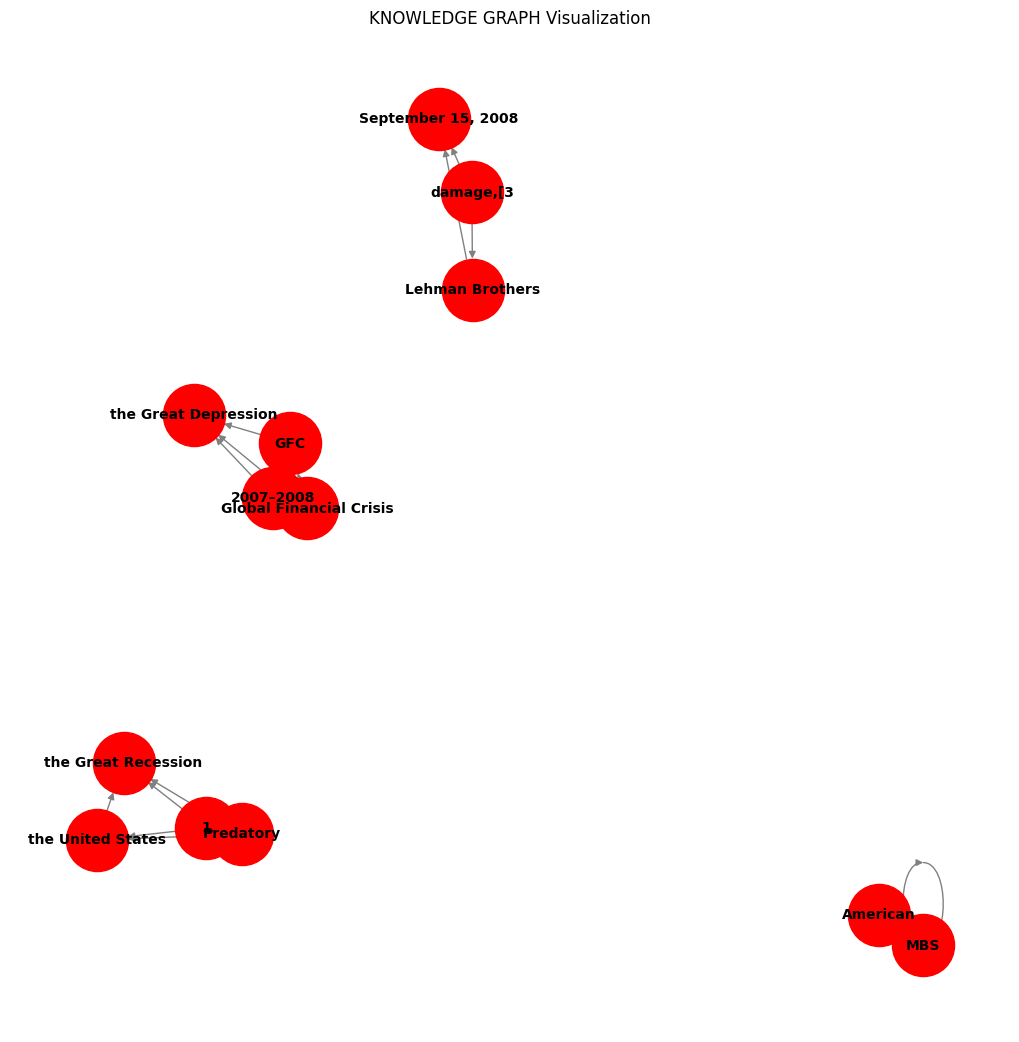

In [11]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='red', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')
plt.title("KNOWLEDGE GRAPH Visualization")
plt.show()


In [13]:
###Check the Nodes
print("Nodes in the graph:")
print(G.nodes())


Nodes in the graph:
['2007–2008', 'Global Financial Crisis', 'GFC', 'the Great Depression', 'Predatory', '1', 'the United States', 'the Great Recession', 'MBS', 'American', 'damage,[3', 'Lehman Brothers', 'September 15, 2008']


In [14]:
###Check the edges
print("\nEdges in the graph:")
print(G.edges())



Edges in the graph:
[('2007–2008', 'Global Financial Crisis'), ('2007–2008', 'GFC'), ('2007–2008', 'the Great Depression'), ('Global Financial Crisis', 'GFC'), ('Global Financial Crisis', 'the Great Depression'), ('GFC', 'the Great Depression'), ('Predatory', '1'), ('Predatory', 'the United States'), ('Predatory', 'the Great Recession'), ('1', 'the United States'), ('1', 'the Great Recession'), ('the United States', 'the Great Recession'), ('MBS', 'American'), ('MBS', 'MBS'), ('American', 'MBS'), ('damage,[3', 'Lehman Brothers'), ('damage,[3', 'September 15, 2008'), ('Lehman Brothers', 'September 15, 2008')]


In [17]:
###Graph Details
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 13
Number of edges: 18
